# What is web scraping?
Web scraping is the process of collecting structured web data in an automated fashion. It’s also called web data extraction. Some of the main use cases of web scraping include price monitoring, price intelligence, news monitoring, lead generation, and market research among many others.

In general, web data extraction is used by people and businesses who want to make use of the vast amount of publicly available web data to make smarter decisions.

### The popular libraries/tools used for web scraping are:
1. Selenium – a framework for testing web applications<br>
2. BeautifulSoup – Python library for getting data out of HTML, XML, and other markup languages<br>
3. Pandas – Python library for data manipulation and analysi<br>

## Extracting <font color = "blue">Domino’s Pizza </font> reviews

### Step 1: Find the URL of the webpage that you want to scrape


Open the URL “consumeraffairs.com/food” and search for Domino’s Pizza in the search bar and hit Enter.

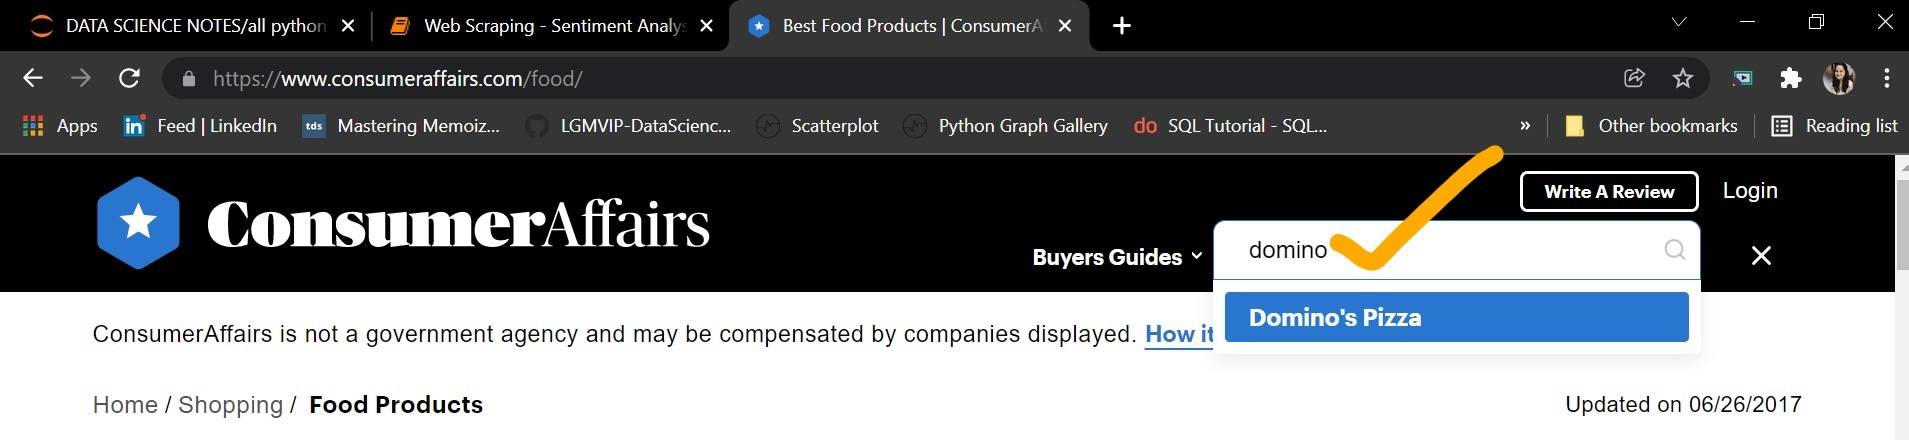

##### Step 1.1: Defining the Base URL, Query parameters

In [1]:
Base_URL = "https://www.consumeraffairs.com/food/dominos.html?page="

In [2]:
Query_Parameter = "?page="+str(5)

In [3]:
URL = Base_URL + Query_Parameter

### Step 2: Select the particular elements by inspecting
Below is an image of a sample review. Each review has many elements: the rating given by the user, username, review date, and the review text along with some information about how many people liked it.

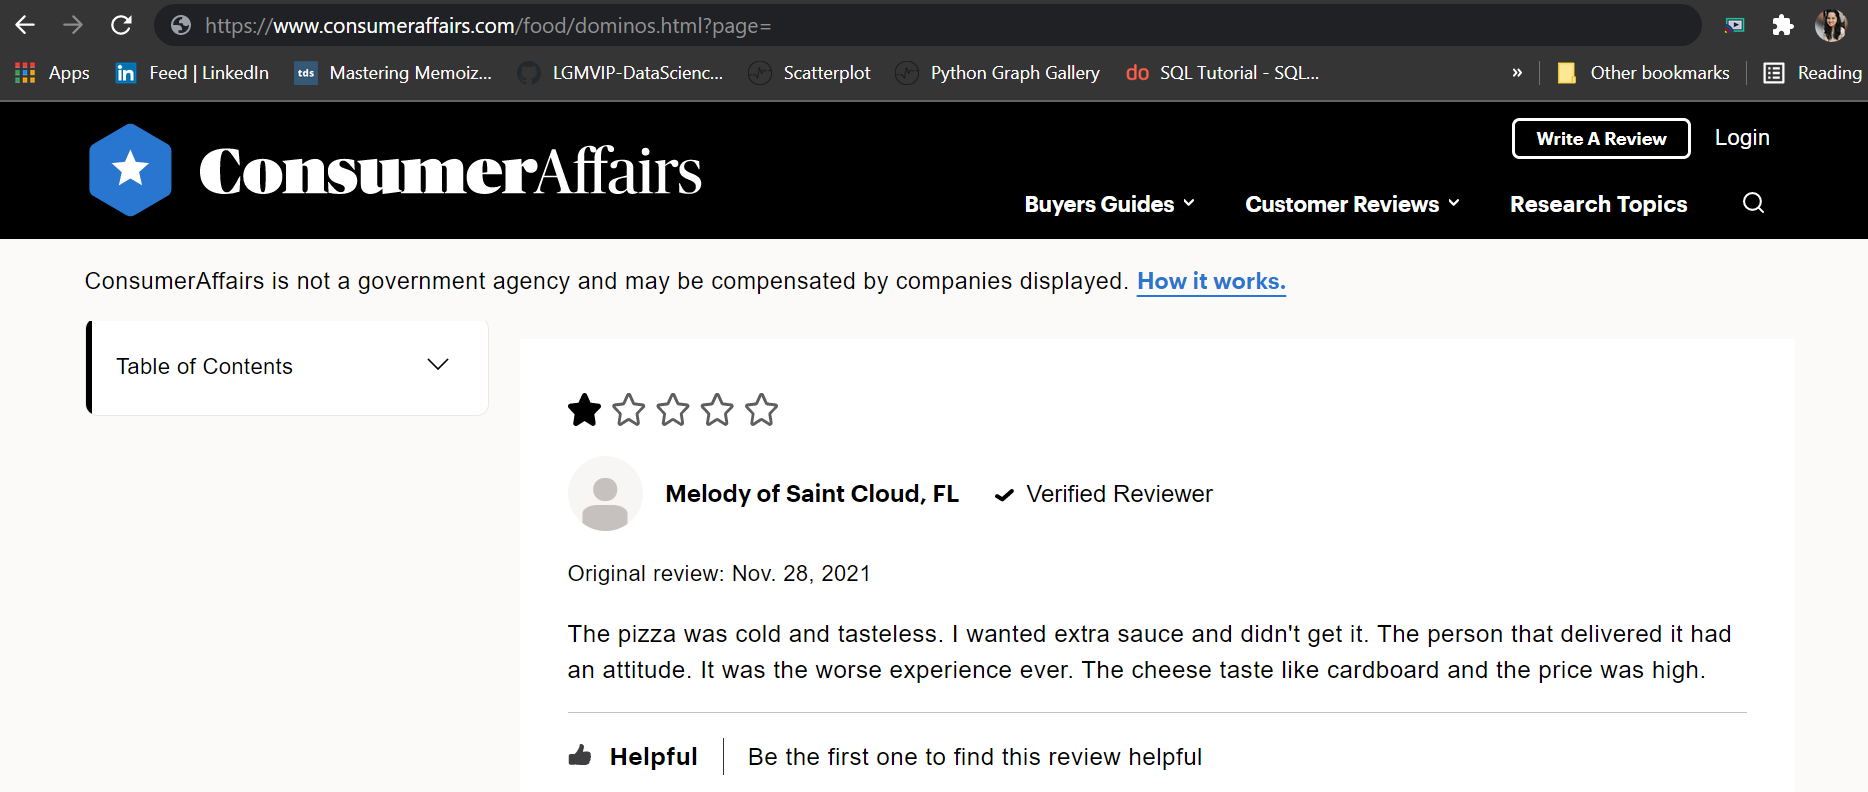

Our interest is to extract only the review text. For that, we need to Inspect the page and obtain the HTML tags, attribute names of the target element.

To inspect a web page, right-click on the page, select Inspect, or use the keyboard shortcut Ctrl+Shift+I.

In our case, the review text is stored in the HTML <p> tag of the div with the class name “rvw-bd“

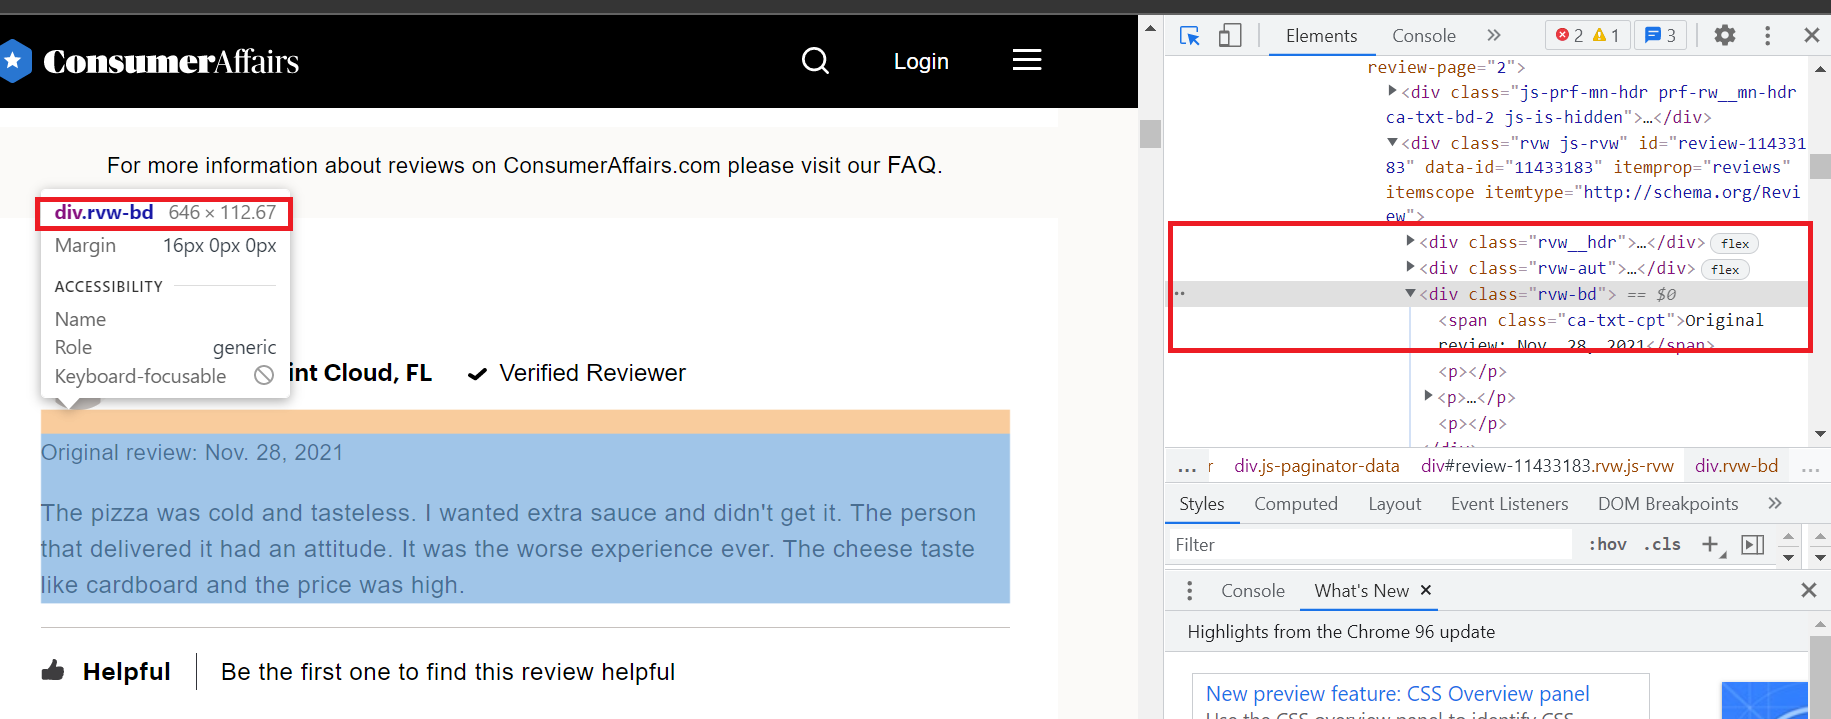

Inspecting the target elements
With this, we got familiar with the webpage. Let’s quickly jump into the scraping.

### Step 3: Write the code to get the content of the selected elements
Begin with installing the necessary modules/packages

In [4]:
# import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

`pandas` – to create a dataframe<br>
`requests` – to send HTTP requests and access the HTML content from the target webpage<br>
`BeautifulSoup` – is a Python Library for parsing structured HTML data<br>



In [5]:
# create an empty list to store all the reviews

all_page_reviews = []

In [6]:
# create a scraper function

def scraper():
    
    # loop through range of page numbers
    for i in range(1,6): # fetching reviews from 5 pages
        
        #creating an empty list to store review of each page
        
        pagewise_review = []
        
        #query parameter
        query_parameter = "?page=" + str(i)
        
        #constructing the url
        url = Base_URL + query_parameter
        
        #send HTTP request to the url
        response = requests.get(url)
        
        #create a soup object and parse the HTML page
        soup = bs(response.content,"html.parser")
        
        #finding all the elements having reviews using class attributes
        review_div = soup.findAll("div",attrs = {"class","rvw-bd"})
        
        #loop through all the divs and append
        for j in range(len(review_div)):
            
            #finding all the p tag , to fetch only review text
            pagewise_review.append(review_div[j].find("p").text)
            
        #writing all the reviews into the list
        for k in range(len(pagewise_review)):
            
            all_page_reviews.append(pagewise_review[k])
    
    #return final list of review
    return all_page_reviews
        

In [7]:
#Driver Code

reviews = scraper()

### Step 4: Store the data in the required format
###### 4.1 storing to a pandas dataframe

In [10]:
# storing in a dataframe

i = range(1,len(reviews)+1)

data = pd.DataFrame({"reviews":reviews},index=i)

In [14]:
print(data)

                                              reviews
1   Review for Dominos del Amo bl, Lakewood CA. Ve...
2   I called because my food was cold and not done...
3   I just want to say I LOVE the Denny Hamlin Com...
4   OMG, hands down the best pizza I've had from D...
5   The call went smooth, the delivery guy was qui...
6   I want to sue them. They didn't deliver their ...
7   Went to the Bideford Branch,,,, Spent £22 and ...
8   Ordered a pizza from our local Domino's. It ar...
9   The Domino's located at 13410 Preston Rd, Dall...
10  Worstest service ever. I have visited store or...
11  Review for Dominos del Amo bl, Lakewood CA. Ve...
12  I called because my food was cold and not done...
13  I just want to say I LOVE the Denny Hamlin Com...
14  OMG, hands down the best pizza I've had from D...
15  The call went smooth, the delivery guy was qui...
16  I want to sue them. They didn't deliver their ...
17  Went to the Bideford Branch,,,, Spent £22 and ...
18  Ordered a pizza from our

##### 4.2 Writing the content of the data frame to a text file

In [11]:
#writing  text file

data.to_csv("review.txt",sep="\t")